In [21]:
# %matplotlib inline
%matplotlib ipympl
import numpy as np
import torch

import matplotlib.pyplot as plt
import pytorch3d.transforms as p3dt
import pytorch3d.ops as p3dops

In [13]:
# load base means
test_canonical_means = torch.load('/home/stanlew/src/splatart/canonical_test_means.pth').detach().cpu().numpy()[0]
test_other_means = torch.load('/home/stanlew/src/splatart/other_test_means.pth').detach().cpu().numpy()[0]
test_canonical_colors = torch.load('/home/stanlew/src/splatart/canonical_test_colors.pth').detach().cpu().numpy()
test_other_colors = torch.load('/home/stanlew/src/splatart/other_test_colors.pth').detach().cpu().numpy()

In [14]:
# set colors to be in range [0,1]
min_val = test_canonical_colors.min()
test_canonical_colors -= min_val
test_canonical_colors = test_canonical_colors / test_canonical_colors.max()


min_val = test_other_colors.min()
test_other_colors -= min_val
test_other_colors = test_other_colors / test_other_colors.max()

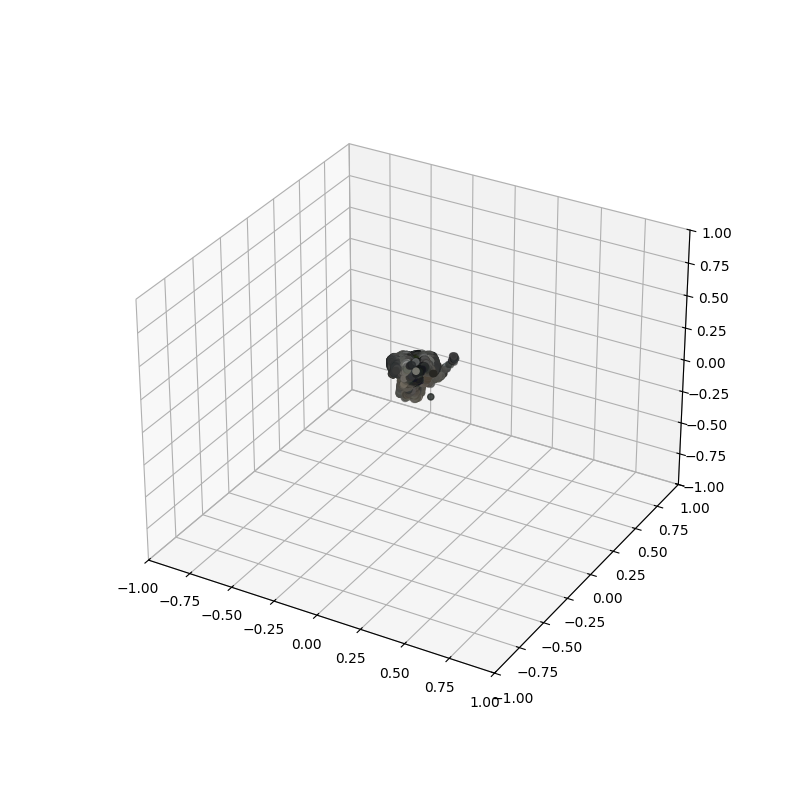

In [31]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
x = test_canonical_means[:,0]
y = test_canonical_means[:,1]
z = test_canonical_means[:,2]
ax.scatter(x, y, z, c=test_canonical_colors)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
plt.show()

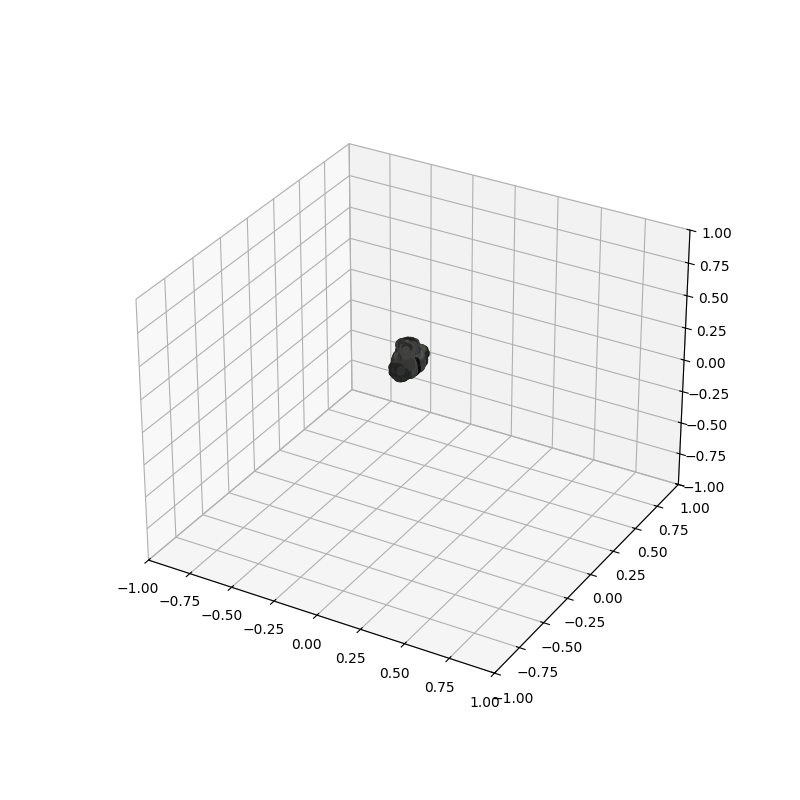

In [32]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
x = test_other_means[:,0]
y = test_other_means[:,1]
z = test_other_means[:,2]
ax.scatter(x, y, z, c=test_other_colors)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
plt.show()

In [34]:
initial_icp_result = p3dops.iterative_closest_point(torch.from_numpy(test_canonical_means).unsqueeze(0), torch.from_numpy(test_other_means).unsqueeze(0))
rts = initial_icp_result.RTs
initial_icp_mat = torch.eye(4)
initial_icp_mat[:3, :3] = rts.R
initial_icp_mat[:3, 3] = rts.T
initial_icp_mat = torch.linalg.inv(initial_icp_mat)

In [35]:
icp_other_means = torch.from_numpy(test_other_means)
# turn other means into homogenous coordinates
icp_other_means = torch.cat((icp_other_means, torch.ones(icp_other_means.shape[0], 1)), dim=1)
print(icp_other_means)

tensor([[-0.0337,  0.0041,  0.1868,  1.0000],
        [-0.0603, -0.0899,  0.2045,  1.0000],
        [-0.0246, -0.0969,  0.2047,  1.0000],
        ...,
        [-0.0957, -0.0905,  0.2478,  1.0000],
        [-0.0372, -0.0985,  0.2104,  1.0000],
        [-0.0423,  0.0403,  0.3167,  1.0000]])


In [36]:
icp_other_means = torch.matmul(initial_icp_mat, icp_other_means.t()).t()

In [37]:
icp_other_means

tensor([[-0.2104, -0.1298, -0.0367,  1.0000],
        [-0.1683, -0.1845,  0.0347,  1.0000],
        [-0.1370, -0.1700,  0.0232,  1.0000],
        ...,
        [-0.1952, -0.1745,  0.0827,  1.0000],
        [-0.1455, -0.1736,  0.0337,  1.0000],
        [-0.2429, -0.0291,  0.0472,  1.0000]])

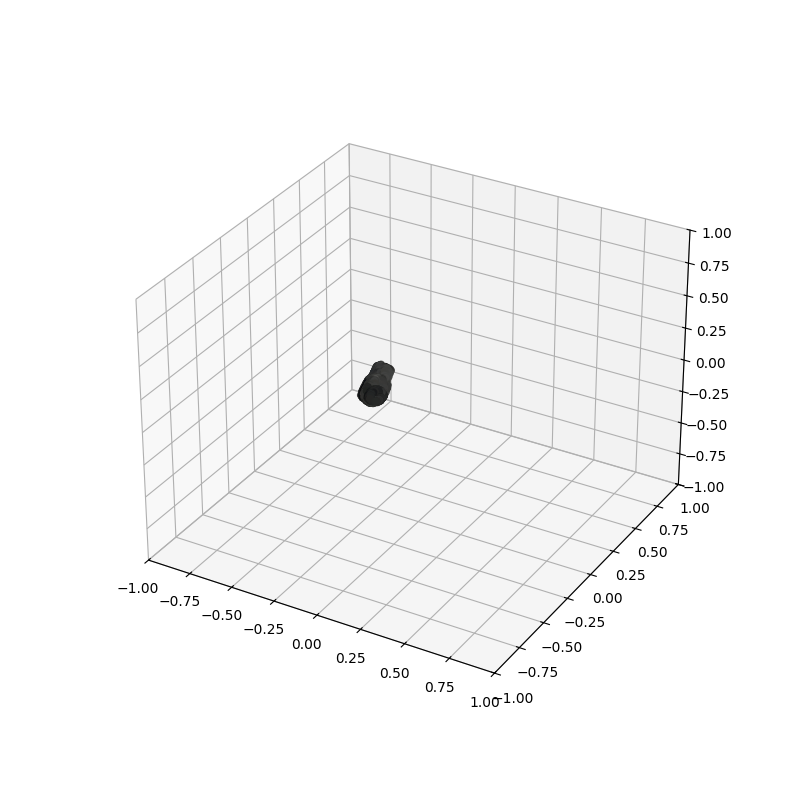

In [38]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
x = icp_other_means[:,0]
y = icp_other_means[:,1]
z = icp_other_means[:,2]
ax.scatter(x, y, z, c=test_other_colors)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
plt.show()